In [1]:
import numpy as np
from numpy import pi

import matplotlib.pyplot as plt
%matplotlib inline

import seawater as sw

#import seaborn as sns
#sns.set(style="darkgrid")
#sns.set(style="whitegrid")

from pyspec import spectrum
from plots_aux import *

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 15 days
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 15 days
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 15 days


In [2]:
plt.rcParams.update({'font.size': 12
    , 'legend.markerscale': 1., 'axes.titlesize': 12, 'axes.labelsize' : 12,
      'legend.fontsize' : 10,'legend.handlelength': 3})

plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)

In [3]:
color2 = '#6495ed'
color1 = '#ff6347'
color5 = '#8470ff'
color3 = '#3cb371'
color4 = '#ffd700'
color6 = '#ba55d3'
lw1=1
aph=.7

## Load SSH and geostrophic vel. spectra calculated by Sarah Gille

column 1:  wavenumber (in cycles per km)

column 2:  descending track spectrum

column 3:  ascending track spectrum

column 4:  descending track lower error bar

column 5:  descending track upper error bar

column 6:  ascending track lower error bar

column 7:  ascending track upper error bar

In [4]:
spec = np.loadtxt('spec/spec_altika_dp.dat')
spec_vel = np.loadtxt('spec/plot_vdata1.dat')

In [5]:
k = spec[:,0]
kv = spec_vel[:,0]

In [20]:
## -2 and -3 slopes in the loglog space
ks = np.array([1.e-3,1])
Es2 = .1e-3*(ks**(-3/2.))
Es4 = 1.e-9*(ks**(-4))
Es5 = 1.e-11*(ks**(-5))
rd1 = 22.64 # [km]
Enoise = np.ones(2)*2.*1.e-4

def add_second_axis(ax1):
    """ Add a x-axis at the top of the spectra figures """
    ax2 = ax1.twiny() 
    ax2.set_xscale('log')
    ax2.set_xlim(ax1.axis()[0], ax1.axis()[1])
    kp = 1./np.array([500.,200.,100.,40.,20.,10.,5.])
    lp=np.array([500,200,100,40,20,10,5])
    ax2.set_xticks(kp)
    ax2.set_xticklabels(lp)
    plt.xlabel('Wavelength [km]')
    
f0 = sw.f(59)
A = (9.81/f0)**2/(1.e6)
slab1=np.load('../adcp/outputs/adcp_spec_slab1.npz')

win = np.hanning(k.size)
fac = (k.size/(win**2).sum())

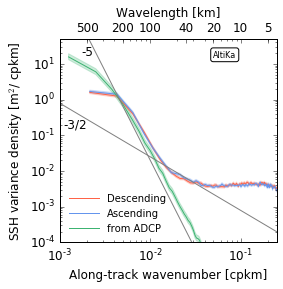

In [48]:
dk = 5.649717514124294

lw = 1.

Essh = fac*(slab1['Eu']+slab1['Ev'])/(A*((2*pi*slab1['k'])**2))/2.
Esshu = fac*(slab1['Euu']+slab1['Evu'])/(A*((2*pi*slab1['k'])**2))/2.
Esshl = fac*(slab1['Eul']+slab1['Evl'])/(A*((2*pi*slab1['k'])**2))/2.

fig = plt.figure(figsize=(8.27/2-.25,11.69/3-.25))
ax1 = fig.add_subplot(111)

ax1.fill_between(k,fac*spec[:,3]/dk,fac*spec[:,4]/dk, color=color1, alpha=0.25)
ax1.fill_between(k,fac*spec[:,5]/dk,fac*spec[:,6]/dk, color=color2, alpha=0.25)
ax1.fill_between(slab1['k'],Esshl,Esshu, color=color3, alpha=0.25)

ax1.set_xscale('log'); ax1.set_yscale('log')

ax1.loglog(k,fac*spec[:,1]/dk,color=color1,linewidth=lw,label="Descending")
ax1.loglog(k,fac*spec[:,2]/dk,color=color2,linewidth=lw,label="Ascending")

ax1.loglog(slab1['k'],Essh,color=color3,linewidth=lw,label="from ADCP")


ax1.axis((1./(1000),1./4,.4e-5,10))

ax1.loglog(ks,Es2/4.,'-', color='0.5',linewidth=1.)
ax1.loglog(ks,Es5/5.,'-', color='0.5',linewidth=1.)

plt.text(0.0011, 3.1/10/2.,u'-3/2',fontsize=12)
plt.text(0.005675/3.25, 16.51,u'-5',fontsize=12)

plt.xlabel('Along-track wavenumber [cpkm]')
plt.ylabel(u'SSH variance density [m$^{2}$/ cpkm]')
    
#plt_spec_error(sn=158)
    
#lg = plt.legend(loc=(.35,.65), numpoints=1,ncol=1)
lg = plt.legend(loc=3, numpoints=1,ncol=1)
#lg.set_title(r"SSH variance spectrum",{'size':25})
lg.draw_frame(False)

plt.axis((1./1.e3,1./4.,1./1.e4,5.e1))

plt.text(1./15, 18., "AltiKa", size=8, rotation=0.,
            ha="center", va="center",
            bbox = dict(boxstyle="round",ec='k',fc='w'))

add_second_axis(ax1)
    
plt.savefig('figs/spec_altika_asc_desc',bbox_inches='tight')
plt.savefig('figs/spec_altika_asc_desc.eps',format='eps',bbox_inches='tight')
plt.savefig('figs/spec_altika_asc_desc.pdf',format='pdf',bbox_inches='tight')

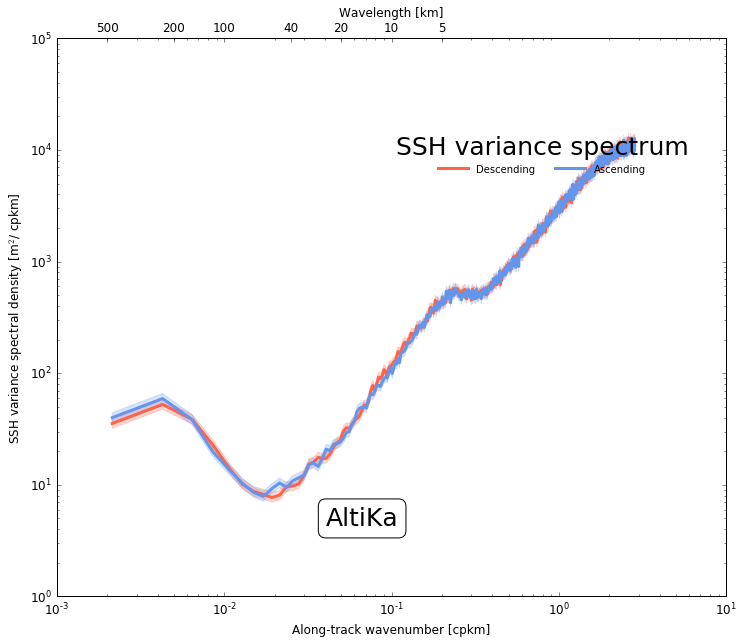

In [8]:
fig = plt.figure(figsize=(12.,10.))
ax1 = fig.add_subplot(111)

ax1.fill_between(kv,spec_vel[:,3],spec_vel[:,4], color=color1, alpha=0.25)
ax1.fill_between(kv,spec_vel[:,5],spec_vel[:,6], color=color2, alpha=0.25)

ax1.set_xscale('log'); ax1.set_yscale('log')

ax1.loglog(kv,spec_vel[:,1],color=color1,linewidth=lw,label="Descending")
ax1.loglog(kv,spec_vel[:,2],color=color2,linewidth=lw,label="Ascending")

#ax1.axis((1./(1000),1./4,.4e-5,10))

#ax1.loglog(ks,Es2,'--', color='k',linewidth=2.,alpha=.7)
#ax1.loglog(ks,Es5,'--', color='k',linewidth=2.,alpha=.7)
#ax1.loglog(ks,Es4,'--', color='k',linewidth=2.,alpha=.7)

#plt.text(0.0011, 3.1,u'k$^{-3/2}$',fontsize=25)
#plt.text(0.0047, 5.51,u'k$^{-5}$',fontsize=25)
#plt.text(0.002, 5.51,u'k$^{-4}$',fontsize=25)


plt.xlabel('Along-track wavenumber [cpkm]')
plt.ylabel(u'SSH variance spectral density [m$^{2}$/ cpkm]')
    
lg = plt.legend(loc=(.5,.75), numpoints=1,ncol=2)
lg.set_title(r"SSH variance spectrum",{'size':25})
lg.draw_frame(False)

#plt.axis((1./1.e3,1./4.,1./1.e3,1.e1))

plt.text(1./15, 5., "AltiKa", size=25, rotation=0.,
            ha="center", va="center",
            bbox = dict(boxstyle="round",ec='k',fc='w'))

add_second_axis(ax1)
    
plt.savefig('figs/spec_altika_asc_desc_vel',bbox_inches='tight')
plt.savefig('figs/spec_altika_asc_desc.eps_vel',format='eps',bbox_inches='tight')
plt.savefig('figs/spec_altika_asc_desc_vel.pdf',format='pdf',bbox_inches='tight')

In [9]:
f0 = sw.f(59)
A = (9.81/f0)**2/(1.e6)
slab1=np.load('../adcp/outputs/adcp_spec_slab1.npz')

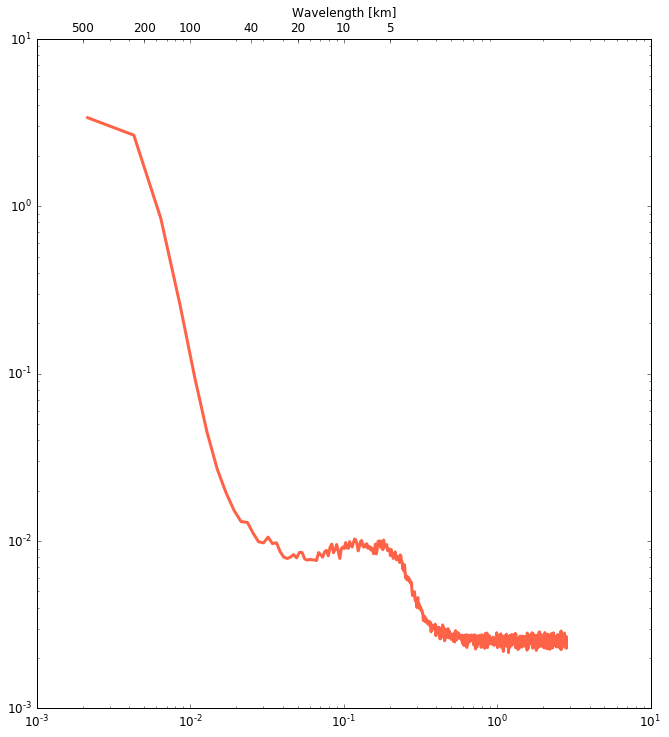

In [10]:
fig = plt.figure(figsize=(11.,12.))
ax1 = fig.add_subplot(111)
ax1.loglog(k,(spec[:,1]),color=color1,linewidth=lw,label="Descending")

#plt.axis((1./1.e3,1.,1./1.e4,1.e0))

add_second_axis(ax1)



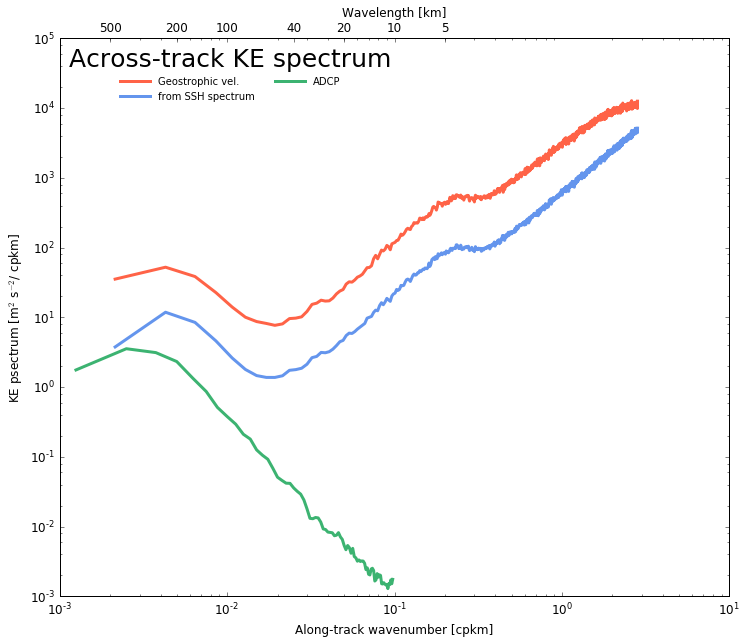

In [11]:

fig = plt.figure(figsize=(12.,10.))
ax1 = fig.add_subplot(111)

#ax1.fill_between(kv,spec_vel[:,3],spec_vel[:,4], color=color1, alpha=0.25)
#ax1.fill_between(kv,spec_vel[:,5],spec_vel[:,6], color=color2, alpha=0.25)

#ax1.set_xscale('log'); ax1.set_yscale('log')

ax1.loglog(kv,spec_vel[:,1],color=color1,linewidth=lw,label="Geostrophic vel.")
#ax1.loglog(kv,spec_vel[:,2],color=color2,linewidth=lw,label="Ascending")

#ax1.axis((1./(1000),1./4,.4e-5,10))

#ax1.loglog(ks,Es2,'--', color='k',linewidth=2.,alpha=.7)
#ax1.loglog(ks,Es5,'--', color='k',linewidth=2.,alpha=.7)
#ax1.loglog(ks,Es4,'--', color='k',linewidth=2.,alpha=.7)

#plt.text(0.0011, 3.1,u'k$^{-3/2}$',fontsize=25)
#plt.text(0.0047, 5.51,u'k$^{-5}$',fontsize=25)
#plt.text(0.002, 5.51,u'k$^{-4}$',fontsize=25)

ax1.loglog(k,A*((2*pi*k)**2)*(spec[:,1]),color=color2,linewidth=lw,label="from SSH spectrum")
ax1.loglog(slab1['k'],slab1['Eu'],color=color3,linewidth=lw,label="ADCP")





plt.xlabel('Along-track wavenumber [cpkm]')
plt.ylabel(u'KE psectrum [m$^{2}$ s$^{-2}$/ cpkm]')
    
lg = plt.legend(loc=2, numpoints=1,ncol=2)
lg.set_title(r"Across-track KE spectrum",{'size':25})
lg.draw_frame(False)

#plt.axis((1./1.e3,1./4.,1./1.e3,1.e1))

#plt.text(1./15, 5., "AltiKa", size=25, rotation=0.,
#            ha="center", va="center",
#            bbox = dict(boxstyle="round",ec='k',fc='w'))

add_second_axis(ax1)
    
plt.savefig('figs/spec_altika_asc_desc_vel',bbox_inches='tight')
plt.savefig('figs/spec_altika_asc_desc.eps_vel',format='eps',bbox_inches='tight')
plt.savefig('figs/spec_altika_asc_desc_vel.pdf',format='pdf',bbox_inches='tight')

['Eul',
 'Evl',
 'Es2',
 'k',
 'kK1',
 'Kpsi',
 'ks',
 'Eu',
 'Ev1',
 'Euu',
 'Es3',
 'Ew1',
 'Ev',
 'Kphi',
 'Evu',
 'Enoise']